# Todo el Proceso de ML con PyCaret

Aqui utilizaremos la libreria PyCaret para realizar todo el proceso de ML de forma automatica, desde el preprocesamiento y limpieza de los datos, pasando por el entrenamiento y seleccion de parametros de nuestra caja negra hasta el analisis posterior de los resultados del modelo.

Comencemos instalando las librerias necesarias.

In [ ]:
!pip install shap -U -q
!pip install pycaret -U -q

Importamos pycaret y vemos su version

In [2]:
import pycaret
pycaret.__version__

'3.3.0'

Cargaremos ahora los datos sin procesar de nuestro ejemplo de diabetes que vimos durante todo el curso.

In [3]:
import pandas as pd
df_ana_train = pd.read_csv('https://raw.githubusercontent.com/amiune/freecodingtour/main/cursos/espanol/datascience/data/diabetes/diabetes_train_analisis.csv')
df_inf_train = pd.read_csv('https://raw.githubusercontent.com/amiune/freecodingtour/main/cursos/espanol/datascience/data/diabetes/diabetes_train_info.csv')
df_train = pd.merge(df_ana_train,df_inf_train,on="id")
df_train = df_train.drop("id",axis=1)
df_train.head()

,colesterol,glucosa,fuma,alcohol,gimnasia,presion,diabetes,edad,altura,peso,sexo
0,bajo,baja,0,0,1,100/80,0,54,169,76.0,f
1,bajo,baja,0,0,1,120/82,0,49,165,65.0,m
2,bajo,baja,0,0,1,120/80,0,21962,170,56.0,m
3,bajo,baja,0,0,0,120\80,0,20287,169,62.0,m
4,bajo,baja,0,0,0,120/80,0,16202,166,67.0,masculino


Inicializamos el ML automatico con PyCaret especificando el dataset, la columna objetivo a predecir y una semilla para poder reproducir el proceso, esta semilla PyCaret la llama session_id y es la que generara todos los numeros aleatorios necesarios para el proceso.

In [4]:
from pycaret.classification import *
s = setup(df_train, target='diabetes', session_id=42)

,Description,Value
0,Session id,42
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(60000, 11)"
4,Transformed data shape,"(60000, 18)"
5,Transformed train set shape,"(42000, 18)"
6,Transformed test set shape,"(18000, 18)"
7,Numeric features,6
8,Categorical features,4
9,Rows with missing values,3.3%


Vemos todas las variables de configuracion que genera PyCaret

In [5]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

Analizamos la variable X_train_transformed que es como PyCaret ha transformado automaticamente nuestro dataset a vectores.

In [6]:
get_config('X_train_transformed')

,colesterol_medio,colesterol_bajo,colesterol_alto,glucosa_baja,glucosa_media,glucosa_alta,fuma,alcohol,gimnasia,presion,edad,altura,peso,sexo_masculino,sexo_m,sexo_f,sexo_femenino
34829,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.498016,18973.0,161.0,74.0,1.0,0.0,0.0,0.0
32868,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.386539,18128.0,178.0,85.0,1.0,0.0,0.0,0.0
37724,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.046589,40.0,159.0,50.0,0.0,1.0,0.0,0.0
58945,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.163159,43.0,157.0,63.0,1.0,0.0,0.0,0.0
13631,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.291052,42.0,158.0,79.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16571,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.163159,56.0,163.0,107.0,0.0,1.0,0.0,0.0
2171,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.133213,16802.0,166.0,62.0,0.0,1.0,0.0,0.0
16701,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.386047,19961.0,175.0,90.0,0.0,0.0,1.0,0.0
48278,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.387518,22841.0,160.0,71.0,0.0,1.0,0.0,0.0


Iniciamos el proceso de entrenamiento de distintos algoritmos de ML y vemos sus resultados. Guardamos el modelo que proporciono los mejores resultados en la variable best.

In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9762,0.0000,0.9411,0.9626,0.9517,0.9359,0.9360,0.9110
lightgbm,Light Gradient Boosting Machine,0.9758,0.0000,0.9385,0.9635,0.9508,0.9348,0.9349,2.2080
rf,Random Forest Classifier,0.9627,0.0000,0.9116,0.9371,0.9241,0.8994,0.8996,3.9540
et,Extra Trees Classifier,0.9625,0.0000,0.9051,0.9422,0.9233,0.8985,0.8988,3.2870
gbc,Gradient Boosting Classifier,0.9576,0.0000,0.8650,0.9613,0.9106,0.8829,0.8850,4.6210
ada,Ada Boost Classifier,0.9542,0.0000,0.8808,0.9317,0.9055,0.8753,0.8759,1.5450
dt,Decision Tree Classifier,0.9538,0.0000,0.9021,0.9117,0.9068,0.8761,0.8762,0.6420
lr,Logistic Regression,0.9308,0.0000,0.8303,0.8850,0.8567,0.8112,0.8119,4.7580
lda,Linear Discriminant Analysis,0.9204,0.0000,0.7463,0.9191,0.8237,0.7729,0.7800,0.3910
ridge,Ridge Classifier,0.9161,0.0000,0.7160,0.9315,0.8096,0.7570,0.7678,0.3800


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Graficamos la matriz de confusion que genera el mejor modelo.

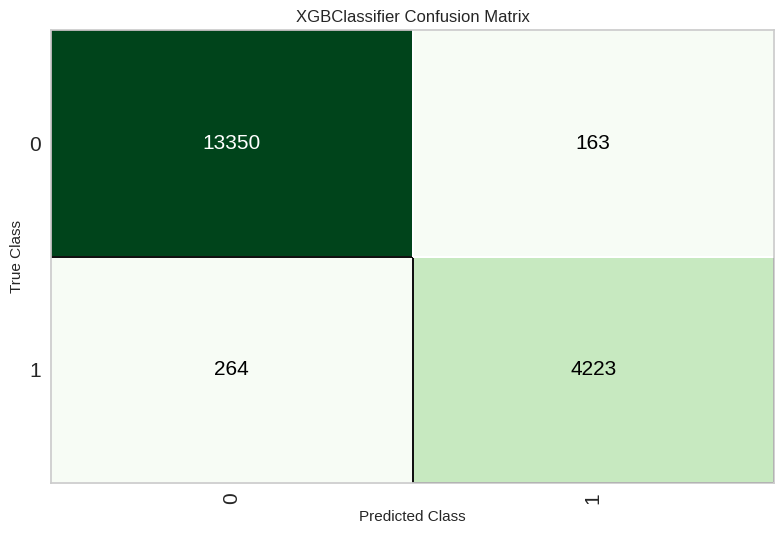

In [8]:
plot_model(best, plot = 'confusion_matrix')

Graficamos la curva roc de confusion que genera el mejor modelo.

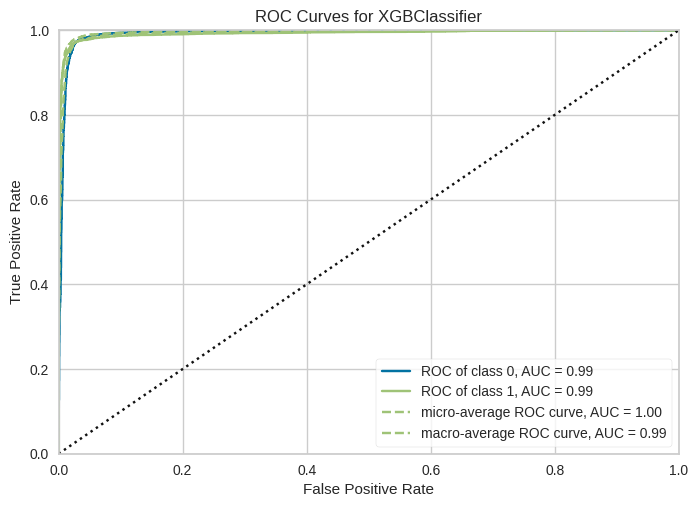

In [9]:
plot_model(best, plot = 'auc')

Graficamos que columnas han sido las mas importantes para el mejor modelo.

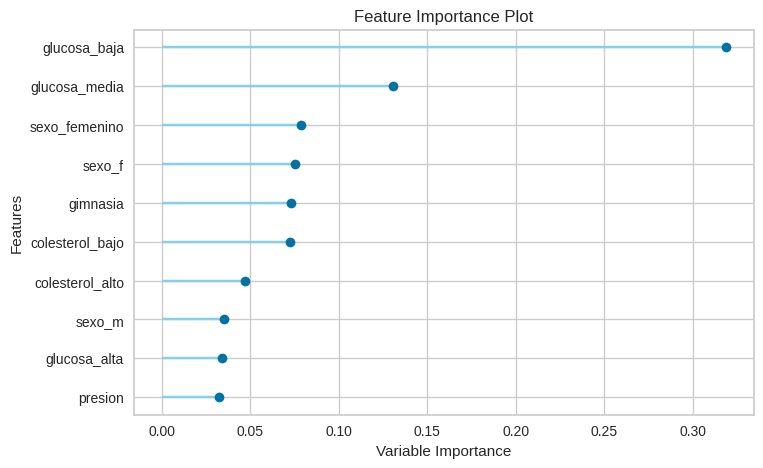

In [10]:
plot_model(best, plot = 'feature')

Graficamos un resumen de los valores Shap

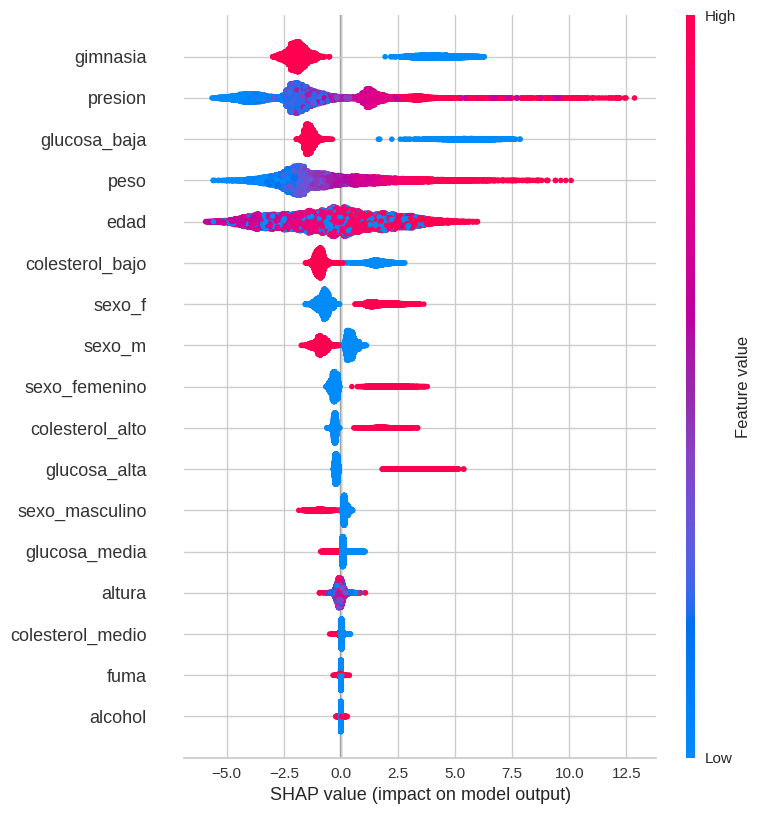

In [12]:
interpret_model(best, plot = 'summary')

Graficamos los valores Shap para una fila en particular

In [13]:
interpret_model(best, plot = 'reason', observation = 1)

Cargamos el dataset de Prueba

In [15]:
df_ana_test = pd.read_csv('https://raw.githubusercontent.com/amiune/freecodingtour/main/cursos/espanol/datascience/data/diabetes/diabetes_test_analisis.csv')
df_inf_test = pd.read_csv('https://raw.githubusercontent.com/amiune/freecodingtour/main/cursos/espanol/datascience/data/diabetes/diabetes_test_info.csv')
df_test = pd.merge(df_ana_test,df_inf_test,on="id")
df_test = df_test.drop("id",axis=1)
df_test.head()

,colesterol,glucosa,fuma,alcohol,gimnasia,presion,diabetes,edad,altura,peso,sexo
0,bajo,media,0,0,0,120/80,1,61,165,90.0,f
1,bajo,baja,0,0,1,100\70,0,14582,162,50.0,m
2,bajo,baja,0,0,0,140/100,1,23389,156,74.0,m
3,bajo,baja,0,0,1,120\90,0,47,162,89.0,m
4,bajo,baja,0,0,0,130\80,0,18388,162,72.0,f


Hacemos predicciones sobre nuevos valores

In [16]:
predictions = predict_model(best, data = df_test)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9753,0.9938,0.9386,0.9633,0.9508,0.9343,0.9344


,colesterol,glucosa,fuma,alcohol,gimnasia,presion,edad,altura,peso,sexo,diabetes,prediction_label,prediction_score
0,bajo,media,0,0,0,120/80,61,165,90.0,f,1,1,1.0000
1,bajo,baja,0,0,1,100\70,14582,162,50.0,m,0,0,1.0000
2,bajo,baja,0,0,0,140/100,23389,156,74.0,m,1,1,0.9992
3,bajo,baja,0,0,1,120\90,47,162,89.0,m,0,0,0.9998
4,bajo,baja,0,0,0,130\80,18388,162,72.0,f,0,1,0.6742


Guardamos el modelo y luego lo cargamos nuevamente para poder usarlo sin volver a ejecutar todo el proceso.

In [ ]:
save_model(best, 'my_first_pipeline')
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

## Referencias:

- https://nbviewer.org/github/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Binary%20Classification.ipynb
- https://pycaret.gitbook.io/docs/get-started/tutorials

# Fin: [Volver al contenido del curso](https://www.freecodingtour.com/cursos/espanol/datascience/datascience.html)